## Importing basic Libraries 

In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

### Load data & Exploratory Data Analysis 

In [2]:
df = pd.read_csv('signal-data.csv')
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
df.shape

(1567, 592)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [5]:
df.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [6]:
df.isna().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [7]:
df=df.fillna(df.mean())

In [8]:
df.isna().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64

In [9]:
df['Pass/Fail'].value_counts().sort_index()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [10]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
0,1567.0,3014.452896,73.480613,2743.2400,2966.66500,3011.8400,3056.5400,3356.3500
1,1567.0,2495.850231,80.227793,2158.7500,2452.88500,2498.9100,2538.7450,2846.4400
2,1567.0,2200.547318,29.380932,2060.6600,2181.09995,2200.9556,2218.0555,2315.2667
3,1567.0,1396.376627,439.712852,0.0000,1083.88580,1287.3538,1590.1699,3715.0417
4,1567.0,4.197013,56.103066,0.6815,1.01770,1.3171,1.5296,1114.5366


## Data Visualization 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

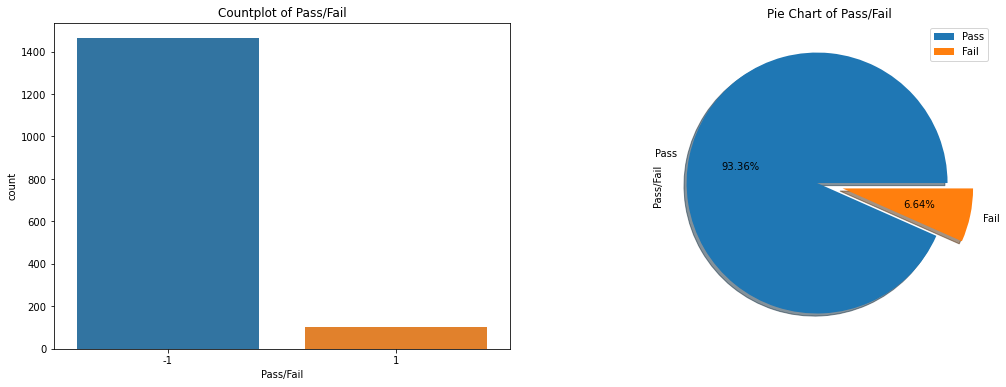

In [12]:
labels = ['Pass', 'Fail']
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Countplot of Pass/Fail')
sns.countplot(df['Pass/Fail'])
plt.subplot(1,2,2)
plt.title('Pie Chart of Pass/Fail')
df['Pass/Fail'].value_counts().plot.pie(labels=labels,shadow=True,explode=(0.1,0.1), autopct='%1.2f%%')
plt.legend();

## Data Pre-processing & Co-Relation

In [13]:
corr=df.corr()
corr

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.143840,0.004756,-0.007613,-0.011014,NaN,0.002270,0.031483,-0.052622,0.009045,...,-0.017120,0.000224,0.023453,0.019907,0.023589,0.018443,-0.025880,-0.028166,0.004174,-0.025141
1,-0.143840,1.000000,0.005767,-0.007568,-0.001636,NaN,-0.025564,-0.012037,0.031258,0.023964,...,0.054006,0.043556,0.002904,-0.001264,0.002273,-0.009403,0.017266,0.010118,0.044797,-0.002603
2,0.004756,0.005767,1.000000,0.298935,0.095891,NaN,-0.136225,-0.146213,0.023528,0.016168,...,-0.007054,-0.006023,0.015697,0.018225,0.015752,-0.025495,-0.029345,-0.030818,-0.032890,-0.000957
3,-0.007613,-0.007568,0.298935,1.000000,-0.058483,NaN,-0.685835,0.073856,-0.102892,0.068215,...,-0.071311,0.008988,0.025436,0.024736,0.026019,0.034711,-0.039132,-0.033645,-0.080341,-0.024623
4,-0.011014,-0.001636,0.095891,-0.058483,1.000000,NaN,-0.074368,-0.347734,-0.025946,0.054206,...,0.088167,0.045081,-0.001300,-0.001597,-0.001616,-0.043929,-0.031005,-0.026100,0.050910,-0.013756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.018443,-0.009403,-0.025495,0.034711,-0.043929,NaN,-0.041209,0.058113,0.010433,0.033738,...,-0.283333,-0.016726,0.002257,0.001605,0.002743,1.000000,0.167913,0.164238,-0.486559,0.004156
587,-0.025880,0.017266,-0.029345,-0.039132,-0.031005,NaN,0.034027,-0.021426,0.022845,0.059301,...,0.272404,-0.024473,-0.002649,-0.002498,-0.002930,0.167913,1.000000,0.974276,0.390813,0.035391
588,-0.028166,0.010118,-0.030818,-0.033645,-0.026100,NaN,0.032227,-0.020893,0.026250,0.060758,...,0.258745,-0.020705,-0.002260,-0.001957,-0.002530,0.164238,0.974276,1.000000,0.389211,0.031167
589,0.004174,0.044797,-0.032890,-0.080341,0.050910,NaN,0.043777,-0.107804,-0.022770,0.004880,...,0.585288,0.041486,-0.003008,-0.003295,-0.003800,-0.486559,0.390813,0.389211,1.000000,-0.002653


In [14]:
df=df.drop(columns=['Time'],axis=1)

In [15]:
#seprating Target Vs predictors 

x=df.drop(columns=['Pass/Fail'],axis=1)
y=df['Pass/Fail']

#### Splitting them into train test and split 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1
                                                   )
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1096, 590)
shape of x_test:  (471, 590)
shape of y_train:  (1096,)
shape of y_test:  (471,)


#### Scalling of data 

In [18]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()

In [19]:
x_train=sd.fit_transform(x_train)
x_test=sd.fit_transform(x_test)

### Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model=LogisticRegression()
model.fit(x_train ,y_train)

y_pred=model.predict(x_test)

print('Training Accuracy :',model.score(x_train, y_train) )
print('Test Accuracy :',model.score(x_test, y_test) )

Training Accuracy : 0.9990875912408759
Test Accuracy : 0.8853503184713376


Text(42.0, 0.5, 'Actual labels')

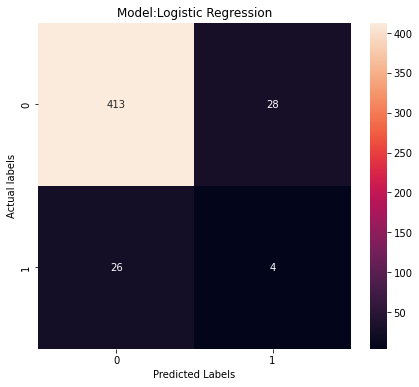

In [22]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

plt.figure(figsize=(7,6))
plt.title('Model:Logistic Regression')
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual labels')

In [23]:
print('classification Matrix:\n', classification_report(y_test,y_pred))  

classification Matrix:
               precision    recall  f1-score   support

          -1       0.94      0.94      0.94       439
           1       0.13      0.12      0.13        32

    accuracy                           0.89       471
   macro avg       0.53      0.53      0.53       471
weighted avg       0.88      0.89      0.88       471



## Hyper Parameters and Tunning
### Logistic Regression

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
model = LogisticRegression()
parameters=[{'solver': [ 'lbfgs', 'liblinear'],
              'C': [1.0],
              'penalty': ['l1', 'l2']}]

In [26]:
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           cv = 2,)

In [29]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid=[{'C': [1.0], 'penalty': ['l1', 'l2'],
                          'solver': ['lbfgs', 'liblinear']}])

In [30]:
print(grid_search.best_params_)

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [31]:
model=LogisticRegression(solver='liblinear', penalty='l1', C=1.0)
model.fit(x_train ,y_train)

y_pred=model.predict(x_test)

print('Training Accuracy :',model.score(x_train, y_train) )
print('Test Accuracy :',model.score(x_test, y_test) )

Training Accuracy : 0.9844890510948905
Test Accuracy : 0.9023354564755839


In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

plt.figure(figsize=(7,6))
plt.title('Model:Logistic Regression')
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual labels')

In [ ]:
print('classification Matrix:\n', classification_report(y_test,y_pred))  

### Infrences Of Logistic Regression 

 - Accuracy of  Model without Tunning is 88%.
 - Model fails to classify around 26 who were predicted aa Fail but Pass.
 - Model Fail to classify 28 who were predicted as Pass but Fail
 - who were pass. Model is able to predict 94% of those people and it performs brilliantly while predicting 94% correctly  who were pass
 - who were Fail model is able to predict only the 13% of those people and out of only 12% able to identify correctly of those who were fail
 
 ### Infrences Of Logistic Regression After model tunninga & Hyper Parameters
 
 
 - Accuracy of  Model after Tunning is 90%.
 - Model fails to classify around 17 who were predicted aa Fail but Pass.
 - Model Fail to classify 29 who were predicted as Pass but Fail
 - who were pass. Model is able to predict 94% of those people and it performs brilliantly while predicting 96% correctly  who were pass
 - who were Fail model is able to predict only the 15% of those people and out of only 09% able to identify correctly of those who were fail. while model recall score of failed is not much good 
 #### Overall Model After Tunning is more Accurate .

### Support Vector Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
model=SVC()
model.fit(x_train ,y_train)

y_pred2=model.predict(x_test)

print('Training Accuracy :',model.score(x_train, y_train) )
print('Test Accuracy :',model.score(x_test, y_test) )

In [ ]:
plt.figure(figsize=(7,6))
plt.title('Model:Support Vector Machine')
cm=confusion_matrix(y_pred2,y_test)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual labels')

In [ ]:
print('classification Matrix:\n', classification_report(y_test, y_pred2))  

## Hyper Parameters and Tunning
### Support Vector Machines

In [ ]:
model=SVC()
parameters=[{'kernel': ['linear', ' poly' , 'rbf', 'sigmoid'],
              'C': [1.0,0.1,100],
             'gamma':['scale','auto']}]

In [ ]:
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           cv = 2,)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
print(grid_search.best_params_)

In [ ]:
model=SVC(C=1.0, gamma='scale', kernel='rbf')
model.fit(x_train ,y_train)

y_pred=model.predict(x_test)

print('Training Accuracy :',model.score(x_train, y_train) )
print('Test Accuracy :',model.score(x_test, y_test) )

In [ ]:
plt.figure(figsize=(7,6))
plt.title('Model:Support Vector Machine')
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual labels')

In [ ]:
print('classification Matrix:\n', classification_report(y_test, y_pred2))  

### Infrences Of SVC

 - Accuracy of  Model without Tunning is 93%.
 - Model fails to classify ones who were Fail but Pass.
 - Model Fail to classify 32 who were predicted as Pass but Fail
 - who were pass. Model is able to predict 93% of those people and it performs brilliantly while predicting 100% correctly  who were pass
 ### Infrences Of SVC After model tunninga & Hyper Parameters
 
 
 - Accuracy of  Model after Tunning is 93%.
 - Model fails to classify ones who were Fail but Pass.
 - Model Fail to classify 32 who were predicted as Pass but Fail
 - who were pass. Model is able to predict 94% of those people and it performs brilliantly while predicting 100% correctly  who were pass
 #### Overall Model is same After doing tunning As well .

### KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred3 = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

In [ ]:
plt.figure(figsize=(7,6))
plt.title('Model:KNN Classifier')
cm=confusion_matrix(y_test, y_pred3)
sns.heatmap(cm,annot=True,fmt='g', cmap='summer')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual labels')

In [ ]:
print('classification Matrix:\n', classification_report(y_pred3,y_test))  

## Hyper Parameters and Tunning
### KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier()
parameters = [{'n_neighbors': range(1,8),
              "weights":['uniform','distance'],
              "algorithm": ['auto', 'ball_tree','kd_tree'],
              'metric' :['euclidean', 'manhattan', 'minkowski']}]

In [ ]:
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           cv = 3,)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
print(grid_search.best_params_)

In [ ]:
model = KNeighborsClassifier(algorithm='auto', metric='euclidean', n_neighbors= 7, weights='uniform')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

In [ ]:
plt.figure(figsize=(7,6))
plt.title('Model:KNN Classifier')
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='g', cmap='summer')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual labels')

In [ ]:
print('classification Matrix:\n', classification_report(y_pred,y_test))  

### Infrences Of KNneighborClassifier Regression 

 - Accuracy of  Model without Tunning is 92%.
 - Model fails to classify around 32 who were predicted aa Fail but Pass.
 - Model Fail to classify 2 who were predicted as Pass but Fail
 - who were pass. Model is able to predict 100% of those people and it performs brilliantly while predicting 93% correctly    who were pass
 - who were Fail model is able to predict only the 2% of those people who were fail.
 
 ### Infrences Of KNneighborClassifier After model tunninga & Hyper Parameters
 
 
 - Accuracy of  Model after Tunning is 93%.
 - Model fails to classify around 32 who were predicted aa Fail but Pass.
 - Model Fail to classify who predicted as Pass but Fail
 - who were pass. Model is able to predict 100% of those people and it performs brilliantly while predicting 93% correctly    who were pass
 - who were Fail model is not able to predict.
 
 #### Overall Model before Tunning is more Accurate .

###  AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model = AdaBoostClassifier()
model.fit(x_train, y_train)

y_pred4 = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

In [ ]:
plt.figure(figsize=(7,6))
plt.title('Model:Adaboost Classifier')
cm=confusion_matrix(y_test, y_pred4)

sns.heatmap(cm,annot=True,fmt='g' ,cmap = 'YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual labels')

In [ ]:
print('classification Matrix:\n', classification_report(y_pred4,y_test))  

## Hyper Parameters and Tunning
### AdaBoostClassifier

In [ ]:
model=AdaBoostClassifier()
parameters = [{'n_estimators': [50,100,1000],
              "algorithm": ['SAMME','SAMME.R'],
              'learning_rate' :[1.0]}]

In [ ]:
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           cv = 2,)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
print(grid_search.best_params_)

In [ ]:
model = AdaBoostClassifier(algorithm='SAMME', learning_rate=1.0, n_estimators= 150)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

In [ ]:
plt.figure(figsize=(7,6))
plt.title('Model:ADaboost Classifier')
cm=confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,fmt='g' ,cmap = 'YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual labels')

In [ ]:
print('classification Matrix:\n', classification_report(y_pred,y_test))  

### Infrences Of AdaboostClassifier

 - Accuracy of  Model without Tunning is 92%.
 - Model fails to classify around 27 who were predicted aa Fail but Pass.
 - Model Fail to classify 6 who were predicted as Pass but Fail
 - who were pass. Model is able to predict 99% of those people and it performs brilliantly while predicting 94% correctly  who were pass
 - who were Fail model is able to predict only the 19% of those people and out of only 45% able to identify correctly of those who were fail
 
 ### Infrences Of  AdaboostClassifier After model tunninga & Hyper Parameters
 
 
 - Accuracy of  Model after Tunning is 93%.
 - Model fails to classify around 26 who were predicted aa Fail but Pass.
 - Model Fail to classify 4 who were predicted as Pass but Fail
 - who were pass. Model is able to predict 99% of those people and it performs brilliantly while predicting 94% correctly  who were pass
 - who were Fail model is able to predict only the 19% of those people and out of only 60% able to identify correctly of those who were fail. while model recall score of failed is not much good

 #### Overall Model After Tunning is more Accurate .

### Weightage of Algorithm shown in Pie Chart 

In [ ]:
labels='Logistic','SVC', 'kNN', 'AdaBoostClassifier'
accuracy=[88,93,92,93]
colors = ['cyan', 'lightblue', 'lightgreen', 'pink', 'brown']
explode = [0.1, 0.1,0.1,0.1]

plt.rcParams['figure.figsize'] = (10,6)
plt.pie(accuracy, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%') 
plt.title('Pie Chart Representing every models accuracy Share', fontsize = 20)
plt.show()

###  Weightage of Algorithm shown in Pie Chart after Tunnng & HyperParameters

In [ ]:
labels='Logistic','SVC', 'kNN', 'AdaBoostClassifier'
accuracy=[90,93,93,93]
colors = ['cyan', 'lightblue', 'lightgreen', 'pink', 'brown']
explode = [0.1, 0.1,0.1,0.1]

plt.rcParams['figure.figsize'] = (10,6)
plt.pie(accuracy, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%') 
plt.title('Pie Chart Representing every models accuracy Share', fontsize = 20)
plt.show()

### Up/Over sampling 
#### Synthetic Minority Over Sampling Technique(SMOTE)
##### Its only effect the minority class . it do  not touch the majority Class

In [ ]:
#!pip install -U imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn import metrics 

sm=SMOTE(k_neighbors=5 , random_state=1 , sampling_strategy='auto')
x_resample, y_resample=sm.fit_resample(x,y.ravel())

print(x_resample.shape)
print(y_resample.shape)

In [ ]:
x_train_re, x_test_re, y_train_re, y_test_re = train_test_split(x_resample, y_resample, test_size = 0.3, random_state = 1
                                                   )
print("shape of x_train: ", x_train_re.shape)
print("shape of x_test: ", x_test_re.shape)
print("shape of y_train: ", y_train_re.shape)
print("shape of y_test: ", y_test_re.shape)

In [ ]:
sc = StandardScaler()
x_train_re = sc.fit_transform(x_train_re)
x_test_re = sc.transform(x_test_re)

### LogisticRegression()

In [ ]:
model=LogisticRegression()
model.fit(x_train_re ,y_train_re)

y_pred=model.predict(x_test_re)

print('Training Accuracy :',model.score(x_train_re, y_train_re) )
print('Test Accuracy :',model.score(x_test_re, y_test_re) )
print(metrics.confusion_matrix(y_test_re,y_pred))

### Support vector Machine()

In [ ]:
model=SVC()
model.fit(x_train_re ,y_train_re)

y_pred=model.predict(x_test_re)

print('Training Accuracy :',model.score(x_train_re, y_train_re) )
print('Test Accuracy :',model.score(x_test_re, y_test_re) )
print(metrics.confusion_matrix(y_test_re,y_pred))

### KNeighborsClassifier()

In [ ]:
model=KNeighborsClassifier()
model.fit(x_train_re,y_train_re)

y_pred=model.predict(x_test_re)

print('Training Accuracy :',model.score(x_train_re, y_train_re) )
print('Test Accuracy :',model.score(x_test_re, y_test_re) )
print(metrics.confusion_matrix(y_test_re,y_pred))

### AdaBoostClassifier()

In [ ]:
model = AdaBoostClassifier()
model.fit(x_train_re,y_train_re)

y_pred=model.predict(x_test_re)

print('Training Accuracy :',model.score(x_train_re, y_train_re) )
print('Test Accuracy :',model.score(x_test_re, y_test_re) )
print(metrics.confusion_matrix(y_test_re,y_pred))

### Infrences Of Up sampling

 - Logistic Regressin- Get more Accuracy from earlier i.e accuracy is 94% now as earlier it is 90% which is really efficient. 
 - SVC - Get more Accuracy from earlier i.e accuracy is 99% now as earlier it is 93% which is really efficient. it is the best till yet.
 - KNN - Not working good with Up sampling i.e accuracy is 61% now  as earlier it is 93%.
 - Adaboost Classifier - It is almost same i.e accuracy is 92% now as earlier it is 93% which is almost same.
 

###  Down/Under Sampling 

In [ ]:
df['Pass/Fail'].value_counts()

In [ ]:
failed_tests = np.array(df[df['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

In [ ]:
passed_tests = np.array(df[df['Pass/Fail'] == -1].index)
no_passed_tests = len(passed_tests)

print(no_passed_tests)

In [ ]:
random_indices = np.random.choice(passed_tests,size=no_failed_tests, replace=False)
random_indices = np.array(random_indices)

print(len(random_indices))

In [ ]:
down_sample = np.concatenate([failed_tests,random_indices])
print(len(down_sample))

In [ ]:
df_down_sample = df.loc[down_sample]  

In [ ]:
x_dn = df_down_sample.iloc[:, df_down_sample.columns != 'Pass/Fail'] 
y_dn = df_down_sample.iloc[:, df_down_sample.columns == 'Pass/Fail']

print(x.shape)
print(y.shape)

In [ ]:

x_train_dn, x_test_dn, y_train_dn, y_test_dn = train_test_split(x_dn, y_dn, test_size = 0.2, random_state = 0)

print(x_train_dn.shape)
print(y_train_dn.shape)
print(x_test_dn.shape)
print(y_test_dn.shape)

In [ ]:
sc = StandardScaler()
x_train_dn = sc.fit_transform(x_train_dn)
x_test_dn = sc.transform(x_test_dn)

### LogisticRegression()

In [ ]:
model=LogisticRegression()
model.fit(x_train_dn ,y_train_dn)

y_pred=model.predict(x_test_dn)

print('Training Accuracy :',model.score(x_train_dn, y_train_dn) )
print('Test Accuracy :',model.score(x_test_dn, y_test_dn) )
print(metrics.confusion_matrix(y_test_dn,y_pred))

### Support vector Machine()

In [ ]:
model=SVC()
model.fit(x_train_dn ,y_train_dn)

y_pred=model.predict(x_test_dn)

print('Training Accuracy :',model.score(x_train_dn, y_train_dn) )
print('Test Accuracy :',model.score(x_test_dn, y_test_dn) )
print(metrics.confusion_matrix(y_test_dn,y_pred))

### KNeighborsClassifier()

In [ ]:
model=KNeighborsClassifier()
model.fit(x_train_dn ,y_train_dn)

y_pred=model.predict(x_test_dn)

print('Training Accuracy :',model.score(x_train_dn, y_train_dn) )
print('Test Accuracy :',model.score(x_test_dn, y_test_dn) )
print(metrics.confusion_matrix(y_test_dn,y_pred))

### AdaBoostClassifier()

In [ ]:
model=AdaBoostClassifier()
model.fit(x_train_dn ,y_train_dn)

y_pred=model.predict(x_test_dn)

print('Training Accuracy :',model.score(x_train_dn, y_train_dn) )
print('Test Accuracy :',model.score(x_test_dn, y_test_dn) )
print(metrics.confusion_matrix(y_test_dn,y_pred))

### Infrences Of Down sampling

##### Down sampling is not really helpful for as:-
  - No model is giving good accuracy.
  - Training accuracy is good but fail in Testing accuracy.
  - Its shows overfiiting in the  model

###  PCA (Dimensionality Reduction)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Aplying Zscore to the data 
from scipy.stats import zscore
data_new=df.iloc[:,:590].apply(zscore)

In [ ]:
#Checking Nan Values 
data_new.isnull().any().any()

In [ ]:
# Changing Nan values with 0
data_new = data_new.replace(np.NaN, 0)

In [ ]:
data_new.isnull().any().any()

In [ ]:
# separating the dependent and independent data

x = data_new
y = df["Pass/Fail"]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

In [ ]:
# Covariance matrix 
covmatrix=np.cov(df, rowvar=False)
print(covmatrix)

In [ ]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(covmatrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

In [ ]:
# CHceking PCA Variables with 200
pca=PCA(n_components=200)
pca.fit(x)

In [ ]:
plt.step(list(range(200)),np.cumsum(pca.explained_variance_ratio_),where='mid')
plt.ylabel('Variation explained')
plt.xlabel('Components')
plt.show()

###  PCA with (Components=150)
  - As it is able is cover almost all the variance

In [ ]:
pca=PCA(n_components=150)
pca.fit(x)

In [ ]:
print(pca.components_)

In [ ]:
print(pca.explained_variance_)

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
Xpca=pca.transform(x)
Xpca.T

In [ ]:
Xpca.shape

###  Making a new DataFrame with PCA Variables and Adding Target variable into it .

In [ ]:
new_df=pd.DataFrame(Xpca)
new_df.head()

In [ ]:
new_df['Pass/Fail']=df['Pass/Fail']
new_df.head()

In [ ]:
x_pca=new_df.drop(columns=['Pass/Fail'],axis=1)
y_pca=new_df['Pass/Fail']

print("shape of x:", x.shape)
print("shape of y:", y.shape)

In [ ]:
x_train_pc, x_test_pc, y_train_pc, y_test_pc = train_test_split(x_pca, y_pca, test_size = 0.3, random_state = 1)

print("shape of x_train: ", x_train_pc.shape)
print("shape of x_test: ", x_test_pc.shape)
print("shape of y_train: ", y_train_pc.shape)
print("shape of y_test: ", y_test_pc.shape)

### LogisticRegression()

In [ ]:
model=LogisticRegression()
model.fit(x_train_pc ,y_train_pc)

y_pred=model.predict(x_test_pc)

print('Training Accuracy :',model.score(x_train_pc, y_train_pc) )
print('Test Accuracy :',model.score(x_test_pc, y_test_pc) )
print(metrics.confusion_matrix(y_test_pc,y_pred))

### SVC()

In [ ]:
model=SVC()
model.fit(x_train_pc ,y_train_pc)

y_pred=model.predict(x_test_pc)

print('Training Accuracy :',model.score(x_train_pc, y_train_pc) )
print('Test Accuracy :',model.score(x_test_pc, y_test_pc) )
print(metrics.confusion_matrix(y_test_pc,y_pred))


### KNeighborsClassifier()

In [ ]:
model=KNeighborsClassifier()
model.fit(x_train_pc ,y_train_pc)

y_pred=model.predict(x_test_pc)

print('Training Accuracy :',model.score(x_train_pc, y_train_pc) )
print('Test Accuracy :',model.score(x_test_pc, y_test_pc) )
print(metrics.confusion_matrix(y_test_pc,y_pred))

### AdaBoostClassifier()

In [ ]:
model = AdaBoostClassifier()
model.fit(x_train_pc ,y_train_pc)

y_pred=model.predict(x_test_pc)

print('Training Accuracy :',model.score(x_train_pc, y_train_pc) )
print('Test Accuracy :',model.score(x_test_pc, y_test_pc) )
print(metrics.confusion_matrix(y_test_pc,y_pred))

###  Infrences of PCA 
 - As its accuracy is almost same with the normal data.
 - We did Z score scaling on both the datasets and took PCA with n_components as 150 (90% variance coverage). However PCA      is not able improve either accuracy or recall probably as we were loosing information due to dropping dimensions.
 - Almost variables 589 which able to perform accuracy. PCA with 150 variables is able to perform the almost same accuray.
 - In these types of model PCA is really useful as Columns are really in large no. of size.

# Final Model Choice 

### - The Best Model for this is Support Vector Machine with Up sampling as:-
- The Accuracy rate is Higher.
- The Recall score of model is high.
- We can select the Logistic Regression with upsampling as our mode as well because as accuracy of 94%.

### Model with Tunning and Hyper Parameters .
- The Accuracy rate of ADaboostClassifier is at Second with 94%.
- The Recall score of model is high.
- We can select the ADaboostClassifier as our mode as well because as accuracy of 94% but after SVC.
- The Margin is of very high but at Last we will go with SVC with over sampling .


## Improvements and Suggestions¶

- The dataset should also have contained less columns as we see PCA shows almost the same Accuracy.
- It Can save our time and effort and result is same.
- Overfitting can also be stopped by this .